In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv(r'./pcos.csv')
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,29,21.2,0,46.1,9,0
1,20,20.5,0,59.4,6,0
2,23,23.1,0,69.3,10,0
3,19,32.7,1,77.7,37,1
4,19,25.9,0,49.4,5,0


In [11]:
df[df['PCOS_Diagnosis']==1]

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
3,19,32.7,1,77.7,37,1
8,25,25.7,1,96.8,37,1
11,19,24.7,1,89.2,34,1
17,20,23.8,1,80.2,16,1
20,27,23.9,1,92.4,27,1
21,30,20.8,1,93.0,14,1
28,22,20.7,1,103.1,27,1
34,33,35.4,1,79.4,19,1
37,26,32.8,1,98.1,28,1
38,26,27.7,1,73.0,32,1


In [20]:
age_min = round(df[df['PCOS_Diagnosis'] == 1]['BMI'].min())
age_max = round(df[df['PCOS_Diagnosis'] == 1]['BMI'].max())
print(f"range of age: {age_min}-{age_max}")

range of age: 16-45


In [80]:
min_testosterone = df[df['PCOS_Diagnosis']==1]['Testosterone_Level(ng/dL)'].min()
max_testosterone = df[df['PCOS_Diagnosis']==1]['Testosterone_Level(ng/dL)'].max()
min_afc = df[df['PCOS_Diagnosis']==1]['Antral_Follicle_Count'].min()
max_afc = df[df['PCOS_Diagnosis']==1]['Antral_Follicle_Count'].max()

In [81]:
print(f"general range testosterone level: {min_testosterone}-{max_testosterone}\ngeneral range of afc levels: {min_afc}-{max_afc}")

general range testosterone level: 46.3-136.4
general range of afc levels: 12-39


In [82]:
PCOS_AFC = df[df['Antral_Follicle_Count']>15][['Testosterone_Level(ng/dL)','Antral_Follicle_Count','Age', 'BMI', 'PCOS_Diagnosis']].sort_values(by='Testosterone_Level(ng/dL)')

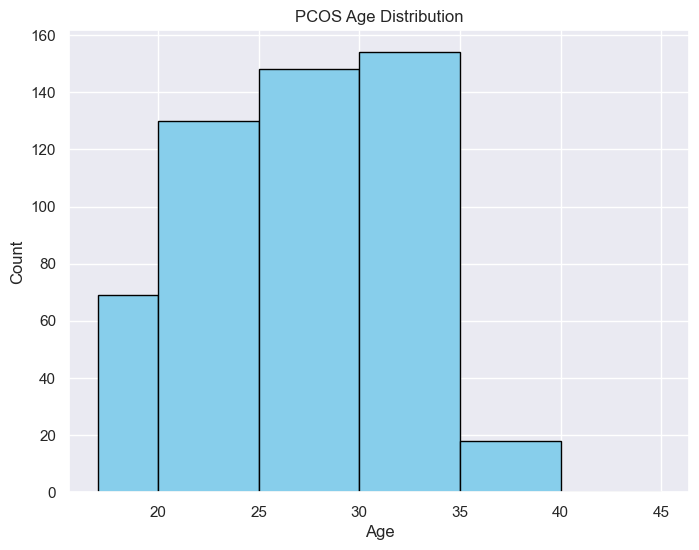

In [86]:
bins = [17, 20, 25, 30, 35, 40, 45]
plt.figure(figsize=(8, 6))
plt.hist(PCOS_AFC['Age'], bins=bins, color='skyblue', edgecolor='black')
plt.title('PCOS Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [84]:
bins = [16, 20, 25, 30, 35, 40, 45]  # Adjust the first bin to include 17-20 years
labels = ['17-20', '21-25', '26-30', '31-35', '36-40', '41-45']

PCOS_AFC['Age Group'] = pd.cut(PCOS_AFC['Age'], bins=bins, labels=labels, right=False)

# Filter for PCOS cases (PCOS_Diagnosis == 1)
PCOS_cases = PCOS_AFC[PCOS_AFC['PCOS_Diagnosis'] == 1]

# Count the number of cases in each age group
age_range_counts = PCOS_cases['Age Group'].value_counts()

# Find the age range with the highest number of PCOS cases
highest_age_range = age_range_counts.idxmax()
highest_count = age_range_counts.max()

print(f"The age range with the highest number of PCOS cases is {highest_age_range} with {highest_count} cases.")


The age range with the highest number of PCOS cases is 31-35 with 154 cases.


In [85]:
AFC_min = df[(df['Age'] > 30) & (df['Age'] < 35) & (df['PCOS_Diagnosis'] == 1)][['Antral_Follicle_Count', 'Testosterone_Level(ng/dL)']]['Antral_Follicle_Count'].min()
testo_min = df[(df['Age'] > 30) & (df['Age'] < 35) & (df['PCOS_Diagnosis'] == 1)][['Antral_Follicle_Count', 'Testosterone_Level(ng/dL)']]['Testosterone_Level(ng/dL)'].min()

if AFC_min < 15:
    testosterone_levels = df[(df['Age'] > 30) & (df['Age'] < 35) & (df['PCOS_Diagnosis'] == 1) & (df['Antral_Follicle_Count'] < 15)]['Testosterone_Level(ng/dL)']
    print(f"alarming range for testosterone levels: {testosterone_levels.min()}-{testosterone_levels.max()}")

if testo_min < 70:
    afc_levels = df[(df['Age'] > 30) & (df['Age'] < 35) & (df['PCOS_Diagnosis'] == 1) & (df['Testosterone_Level(ng/dL)'] < 70)]['Antral_Follicle_Count']
    print(f"AFC level alarming range: {afc_levels.min()}-{afc_levels.max()}")

alarming range for testosterone levels: 63.2-106.5
AFC level alarming range: 12-39


# This was the PCOS Dataset available on kaggle for PCOS Diagnosis
---
# ***FOLLOWING WERE VISUALIZED***
---
- **Which age range has most PCOS positive cases = The age range with the highest number of PCOS cases is 31-35 with 154 cases.**
---
# ***What AFC level and Testosterone level ranges between in these positive cases***
---
***Note:- This is for only for those cases who lies between 31-35 years of age***
- **Alarming range for testosterone levels: 63.2-106.5**
- **AFC level alarming range: 12-39**
---
# ***General AFC and Testosterone level ranges for the whole dataset for PCOS positive***
---
- **general range testosterone level: 46.3-136.4**
- **general range of afc levels: 12-39**